<a href="https://colab.research.google.com/github/morerule/first-repository/blob/master/miniproject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
import datetime as dt
import arch.data.sp500
from arch import arch_model

In [ ]:

# ① 데이터 연결하기
!mkdir -p aiffel/time_series_basic
!cp data/AirPassengers.csv aiffel/time_series_basic/

In [ ]:

# ② ARIMA 실습
ap = pd.read_csv('AirPassengers.csv')
ap.drop('Month', axis=1, inplace=True)

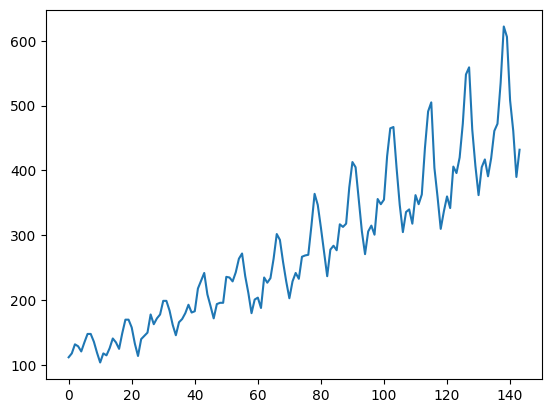

In [ ]:

# ③ 데이터 확인
plt.plot(ap)
plt.show()

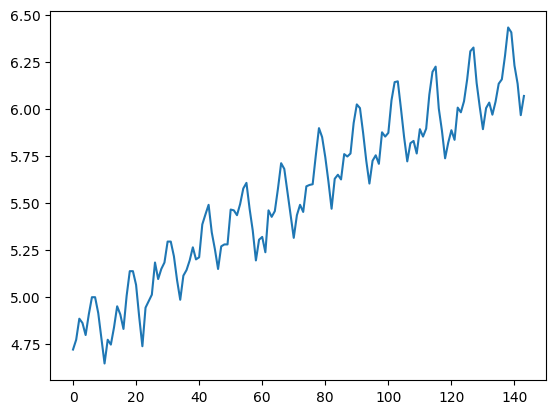

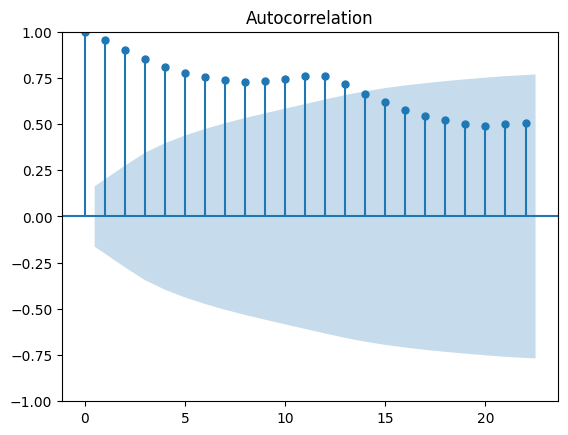

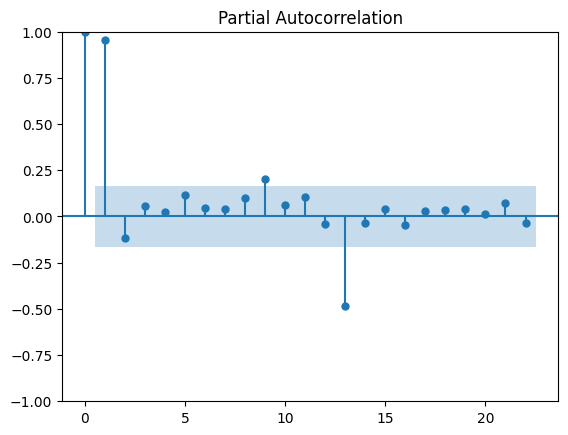

In [ ]:

# ④ 로그 변환 (분산 일정하게 만들기)
ap_transformed = np.log(ap)

plt.plot(ap_transformed)
plt.show()

plot_acf(ap_transformed)
plt.show()

plot_pacf(ap_transformed)
plt.show()

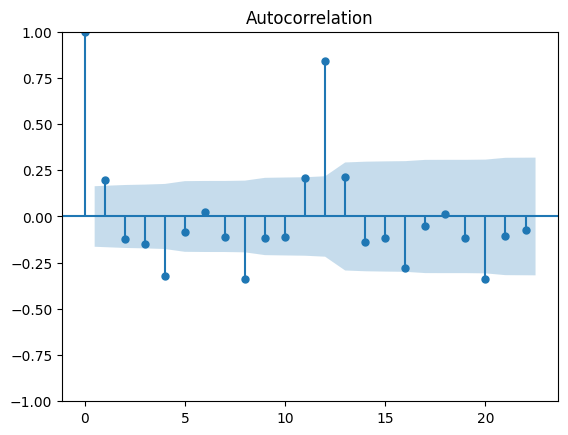

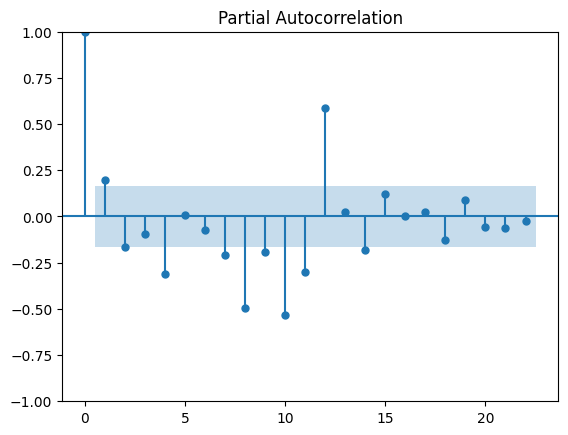

In [ ]:

# ⑤ 차분을 통한 분석
ap_diff = ap_transformed.diff().dropna()

plot_acf(ap_diff)
plt.show()

plot_pacf(ap_diff)
plt.show()

In [ ]:

# train/test 분리
train_size = int(len(ap_transformed) * 0.8)
ap_transformed_train = ap_transformed[:train_size]
ap_transformed_test = ap_transformed[train_size:]

In [ ]:

# ⑥ Auto ARIMA 적용
model = pm.AutoARIMA(seasonal=True, suppress_warnings=True, trace=True, max_D=12)
res = model.fit(ap_transformed_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-189.733, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-191.035, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-192.641, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-189.957, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-196.702, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-196.895, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-212.951, Time=0.23 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-219.958, Time=0.28 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-222.734, Time=0.25 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-220.395, Time=0

In [ ]:

# 예측 및 신뢰구간
preds, conf_int = res.predict(n_periods=ap_transformed_test.shape[0], return_conf_int=True)

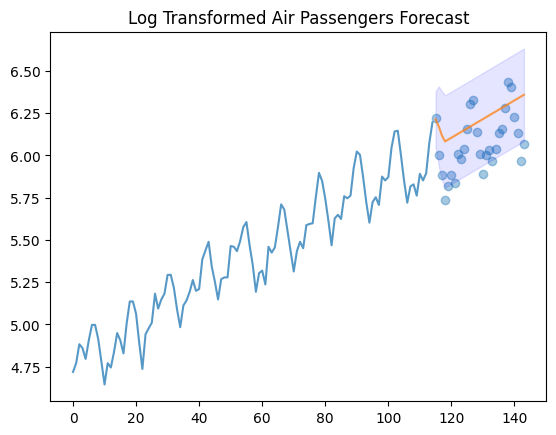

In [ ]:

# 시각화
x_axis = np.arange(ap_transformed_train.shape[0] + preds.shape[0])

plt.plot(x_axis[:ap_transformed_train.shape[0]], ap_transformed_train, alpha=0.75)   # train
plt.plot(x_axis[ap_transformed_train.shape[0]:], preds, alpha=0.75)                  # 예측
plt.scatter(x_axis[ap_transformed_train.shape[0]:], ap_transformed_test, alpha=0.4, marker='o')  # 실제 test
plt.fill_between(x_axis[-preds.shape[0]:], conf_int[:, 0], conf_int[:, 1], alpha=0.1, color='b') # 신뢰구간
plt.title("Log Transformed Air Passengers Forecast")
plt.show()

In [ ]:

# ⑦ ARCH 모델 실습
# 데이터 불러오기
st = dt.datetime(2002, 1, 1)
en = dt.datetime(2022, 1, 1)
data = arch.data.sp500.load()
market = data["Adj Close"]

In [ ]:

# 수익률 계산
returns = 100 * market.pct_change().dropna()

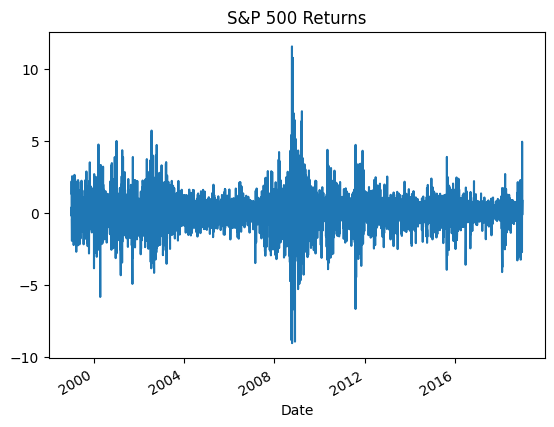

In [ ]:

# 시각화
returns.plot()
plt.title("S&P 500 Returns")
plt.show()

In [ ]:

# ARCH 모델 적용
am = arch_model(returns)
res_arch = am.fit(update_freq=5)

print(res_arch.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 6970.2765831170655
Iteration:     10,   Func. Count:     63,   Neg. LLF: 6936.718477482658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 6936.718476988985
            Iterations: 11
            Function evaluations: 68
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -6936.72
Distribution:                  Normal   AIC:                           13881.4
Method:            Maximum Likelihood   BIC:                           13907.5
                                        No. Observations:                 5030
Date:                Thu, Nov 20 2025   Df Residuals:                     5029
Time:         

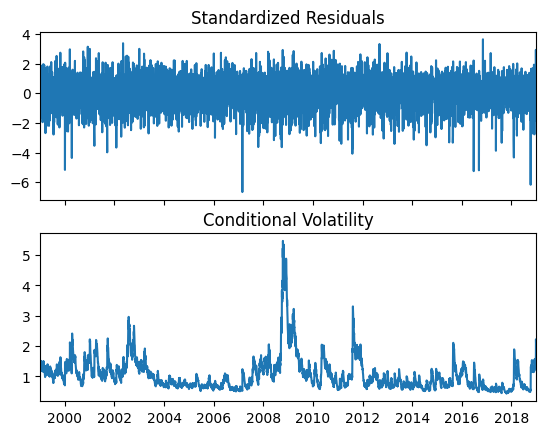

In [ ]:

# 결과 시각화
res_arch.plot()
plt.show()
